In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing required libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import numpy as np
import pandas as pd
import os

# Importing Uber CSV File.
loan = pd.read_csv("loan.csv")
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
#Removing duplicate records from the loan data frame
loan.drop_duplicates(inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.9+ MB


In [9]:
#Getting the column wise null count
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [10]:
loan = loan.dropna(axis = 1, how = 'all')
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [11]:
# Getting column-wise null percentages here

round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
#Dropping the columns with high percentage of null values
loan = loan.drop('next_pymnt_d',axis=1)
loan = loan.drop('mths_since_last_record',axis=1)
loan = loan.drop('mths_since_last_delinq',axis=1)


In [13]:
#Finding if there is any difference between loan amount and funded amount

round(100*((loan['loan_amnt']-loan['funded_amnt']).isnull().sum()/len(loan.index)),2)

#Dropping the loan amount column as it is same as the funded amount
#which indicates that the company has sanctioned the total loan amount requested by the customer

loan = loan.drop('loan_amnt',axis=1)


In [14]:
#Dropping the 'pymnt_plan' column as the payment plan is not in place for all the loans

loan = loan.drop('pymnt_plan',axis=1)

In [15]:
#Dropping the 'zip_code' column as the values are incomplete

loan = loan.drop('zip_code',axis=1)

In [16]:
#Dropping the 'collections_12_mths_ex_med' column as all the values are zero

loan = loan.drop('collections_12_mths_ex_med',axis=1)

In [17]:
#Dropping the 'policy_code' column as all the loans have policy code 1

loan = loan.drop('policy_code',axis=1)

In [18]:



#Dropping the 'application_type' column as all the loans have the application type as 'INDIVIDUAL'

loan = loan.drop('application_type',axis=1)

In [19]:
#Dropping the 'acc_now_delinq' column as the none of the borrowers of the loans has accounts on which he/she is now delinquent.

loan = loan.drop('acc_now_delinq',axis=1)

In [20]:
#Dropping the 'chargeoff_within_12_mths' column as the number of charge-offs within 12 months is zero for all the loans

loan = loan.drop('chargeoff_within_12_mths',axis=1)

In [21]:
#Dropping the 'delinq_amnt' column as the past-due amount owed for the accounts on which the borrower is now delinquent is zero

loan = loan.drop('delinq_amnt',axis=1)

In [22]:
#Dropping the 'tax_liens' column as the number of tax liens is zero

loan = loan.drop('tax_liens',axis=1)


In [23]:
#Dropping the 'initial_list_status' column as all the values in the column has the value 'f'

loan = loan.drop('initial_list_status',axis=1)

In [24]:
#Dropping the columns unnecessary for the analysis

loan = loan.drop('desc',axis=1)
loan = loan.drop('sub_grade',axis=1)
loan = loan.drop('installment',axis=1)
loan = loan.drop('url',axis=1)
loan = loan.drop('title',axis=1)
loan = loan.drop('member_id',axis=1)
loan = loan.drop('out_prncp',axis=1)
loan = loan.drop('out_prncp_inv',axis=1)
loan = loan.drop('inq_last_6mths',axis=1)


In [21]:
# Importing data from loan data frame to excel
#from pandas import ExcelWriter
#os.remove("loan.xlsx")
#writer = ExcelWriter('loan.xlsx')
#loan.to_excel(writer,'Sheet1')
#writer.save()

 
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('Gramener.xlsx')
loan.to_excel(writer,'risk1')
writer.save() 
 


In [25]:
#loan_corr = loan.corr()
#loan_corr.loc[["loan_status"]]


In [26]:
# Write your code for column-wise null percentages here
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
grade                      0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pymnt_d               0.18
last_pym

In [27]:
# filling empty values in  emo_title column so it won't show null values.
loan.loc[pd.isnull(loan['emp_title']), ['emp_title']] = 'NA'
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                         0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
grade                      0.00
emp_title                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pymnt_d               0.18
last_pym

In [28]:
# As emp_length column showimg year in every value,removing it and making it more numerical for future analysis.
loan['emp_length'] =loan['emp_length'].str.replace('years','').str.replace('year','').str.replace('<','').str.replace('+','')


In [29]:
# Adding '5' in emp_length column as it's average value is 5.09.
loan.loc[pd.isnull(loan['emp_length']), ['emp_length']] = '5'

In [30]:
#Changing emp_length data type to int
loan['emp_length'] = loan['emp_length'].astype(str).astype(int)
# Adding '0%' to empty values in revol_util column
loan.loc[pd.isnull(loan['revol_util']), ['revol_util']] = '0%'
# removing empty values by adding "0.0" to 'pub_rec_bankruptcies' columns.
loan.loc[pd.isnull(loan['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = '0.0'
loan.loc[pd.isnull(loan['last_pymnt_d']), ['last_pymnt_d']] = 'Sep-15'
loan.loc[pd.isnull(loan['last_credit_pull_d']), ['last_credit_pull_d']] = '5/1/2016  12:00:00 AM'
loan.loc[pd.isnull(loan['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = '0'
# Changing percentage sign from 'int_rate' and 'revol_util' column to make calculations easy.
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float') / 100.0
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float') / 100.0
 

In [31]:
round(100*(loan.isnull().sum()/len(loan.index)),2)
loan.head()

,id,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,4975.0,36 months,0.1065,B,NA,10,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,16-May,0
1,1077430,2500,2500.0,60 months,0.1527,C,Ryder,1,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0
2,1077175,2400,2400.0,36 months,0.1596,C,NA,10,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,16-May,0
3,1076863,10000,10000.0,36 months,0.1349,C,AIR RESOURCES BOARD,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0
4,1075358,3000,3000.0,60 months,0.1269,B,University Medical Group,1,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0


In [65]:
# As no year is mentioned in these columns so changing it into proper format.
#pd.to_datetime(df.identity_d.str.upper(), format='%b-%y', yearfirst=False)
loan['last_credit_pull_d'] =  pd.to_datetime(loan['last_credit_pull_d'].str.upper(), format='%d-%M', yearfirst=False) 
loan['last_pymnt_d'] =  pd.to_datetime(loan['last_pymnt_d'].str.upper(), format='%d-%M', yearfirst=False)
loan.head()

ValueError: time data '16-MAY' does not match format '%d-%M' (match)

In [35]:
# Till this point all the cleaning has been finished so moving up to Analysis part by adding all these values into new dataframe.
checked_loan= pd.DataFrame(loan) 
checked_loan.head(5)

,id,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,4975.0,36 months,0.1065,B,NA,10,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,16-May,0
1,1077430,2500,2500.0,60 months,0.1527,C,Ryder,1,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0
2,1077175,2400,2400.0,36 months,0.1596,C,NA,10,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,16-May,0
3,1076863,10000,10000.0,36 months,0.1349,C,AIR RESOURCES BOARD,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0
4,1075358,3000,3000.0,60 months,0.1269,B,University Medical Group,1,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0


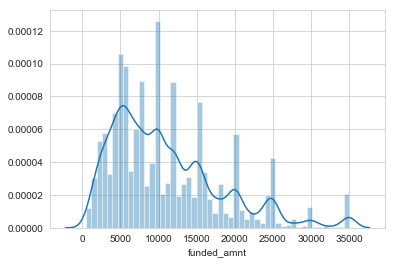

In [36]:
# Before moving to analysing to bi variative or multivariative analysis, It is essential to visualize the characteristics  of some 
# single important variables.
# UNIVARIATIVE ANALYSIS.
#Visualizing 'funded_amnt' column
sns.set_style("whitegrid")
sns.distplot(checked_loan['funded_amnt'])
plt.show()

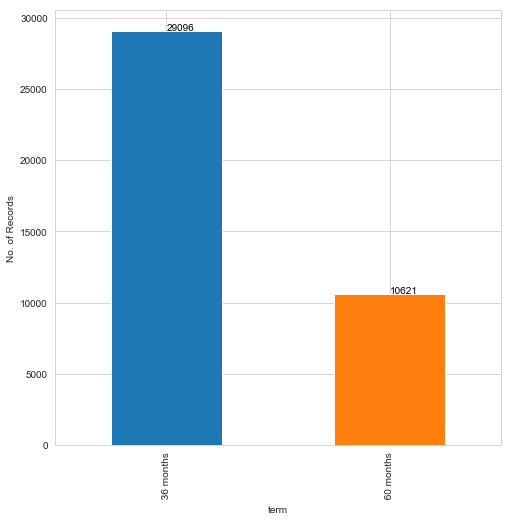

In [37]:
#Univariative ananlysis of term column
#checked_loan['term'].value_counts().plot(kind='bar')
s = checked_loan['term'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax=s.plot.bar(width=.5) 
ax.set_xlabel("term")
ax.set_ylabel("No. of Records")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.term + 0.2 , v.term, color='Black')

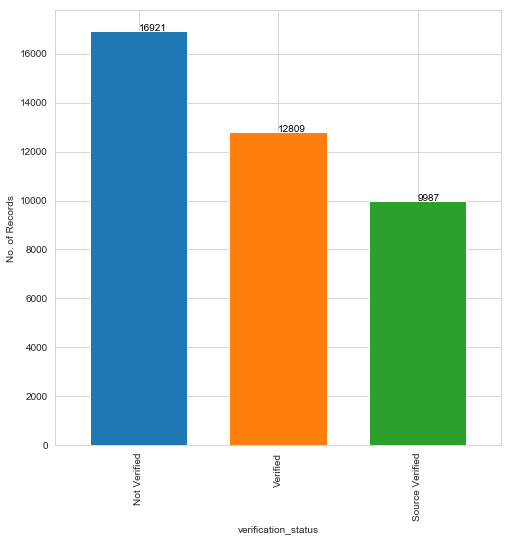

In [38]:
#Univariative ananlysis of verification_status column

s = checked_loan['verification_status'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
ax=s.plot.bar(width=.7) 
ax.set_xlabel("verification_status")
ax.set_ylabel("No. of Records")

for i, v in s.reset_index().iterrows():
    ax.text(i, v.verification_status + 0.2 , v.verification_status, color='black')

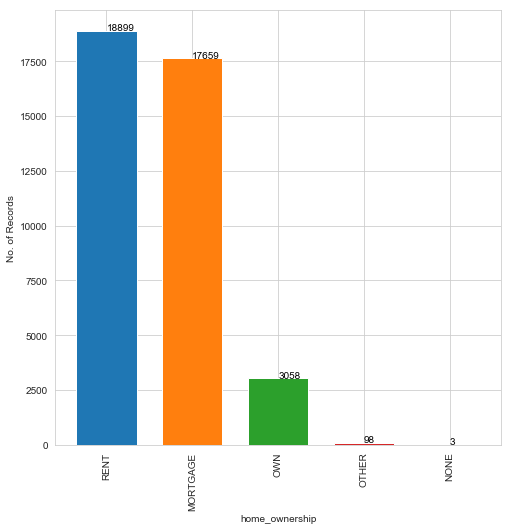

In [39]:
#Univariative ananlysis of home_ownership column


s = checked_loan['home_ownership'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax=s.plot.bar(width=.7) 
ax.set_xlabel("home_ownership")
ax.set_ylabel("No. of Records")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.home_ownership + 0.8 , v.home_ownership, color='black')

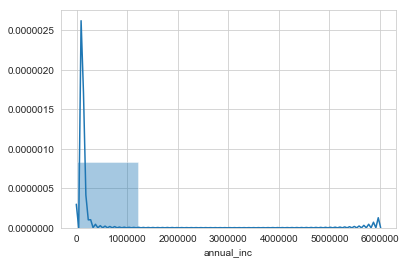

In [40]:
#Visualzing analysis of annual_inc column
sns.set_style("whitegrid")
sns.distplot(checked_loan['annual_inc'],bins=5, kde=True, rug=False)
plt.show()

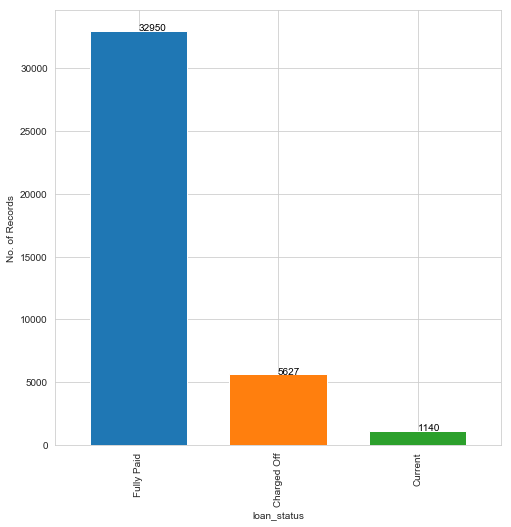

In [41]:
#Analysing loan_status column

s = checked_loan['loan_status'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax=s.plot.bar(width=.7) 
ax.set_xlabel("loan_status")
ax.set_ylabel("No. of Records")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.8 , v.loan_status, color='black')

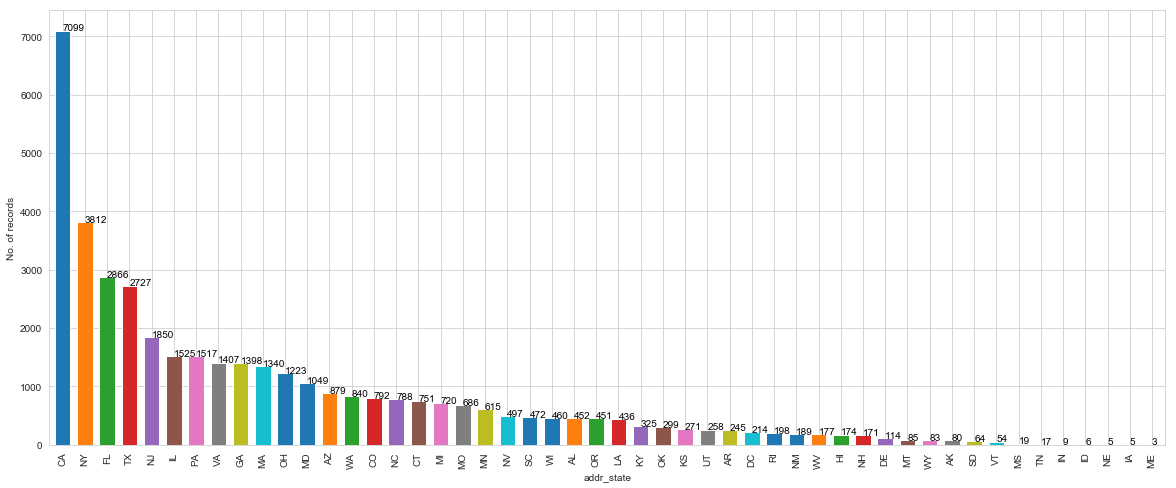

In [42]:
#Analysing addr_state column

s = checked_loan['addr_state'].value_counts()
fig, ax = plt.subplots(figsize=(20, 8))
ax=s.plot.bar(width=.7) 
ax.set_xlabel("addr_state")
ax.set_ylabel("No. of records")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.addr_state + 0.8 , v.addr_state, color='black')

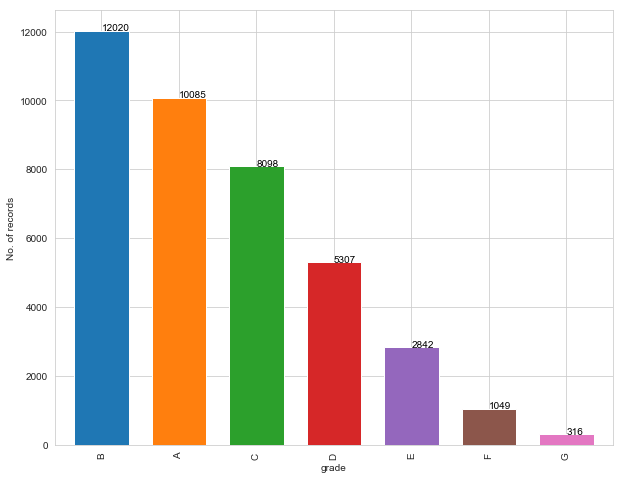

In [43]:
#Univariative Analysis of grade column

s = checked_loan['grade'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
ax=s.plot.bar(width=.7) 
ax.set_xlabel("grade")
ax.set_ylabel("No. of records")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.grade + 0.8 , v.grade, color='black')

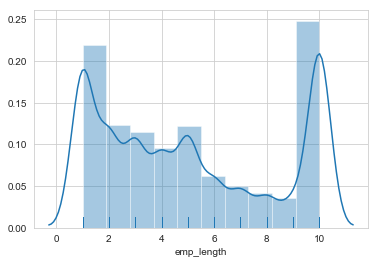

In [44]:
#Univariative ananlysis of emp_length column
sns.set_style("whitegrid")

sns.distplot(checked_loan['emp_length'],bins=10, kde=True, rug=True)
plt.show()

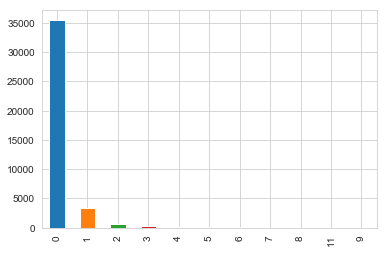

In [45]:
#Analysing on delinq_2yrs column
checked_loan['delinq_2yrs'].value_counts().plot(kind='bar')

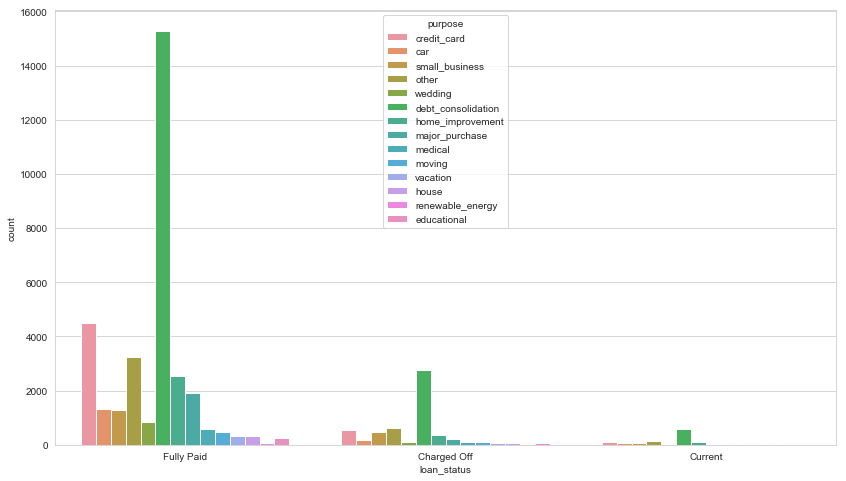

In [46]:
# bar plot with default statistic=mean
# Bivariative Analysis of loan_Status and purpose
fig, ax = plt.subplots(figsize=(14, 8))
 
ax = sns.countplot(x="loan_status", hue="purpose", data=checked_loan)

plt.show()

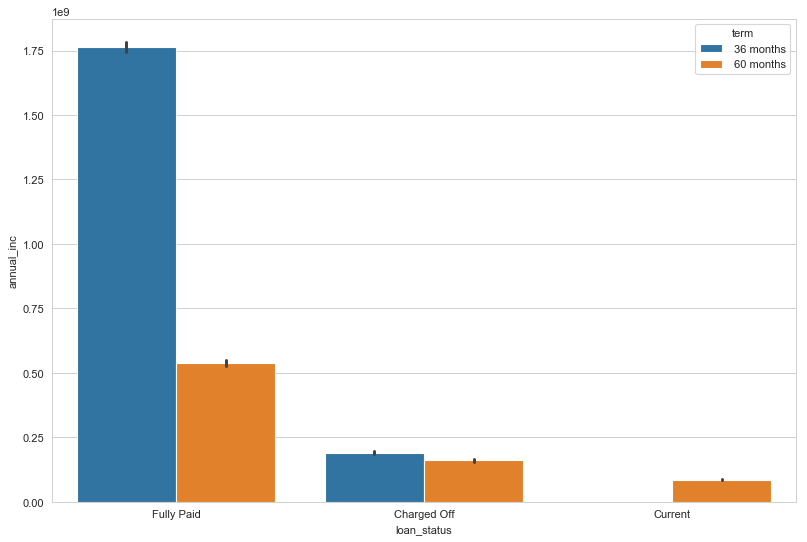

In [47]:
# set figure size for larger figure
#Bivariative analysis of annual_inc,term and loan_status
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_status', y='annual_inc', hue="term", data=checked_loan, estimator=np.sum)
plt.show()

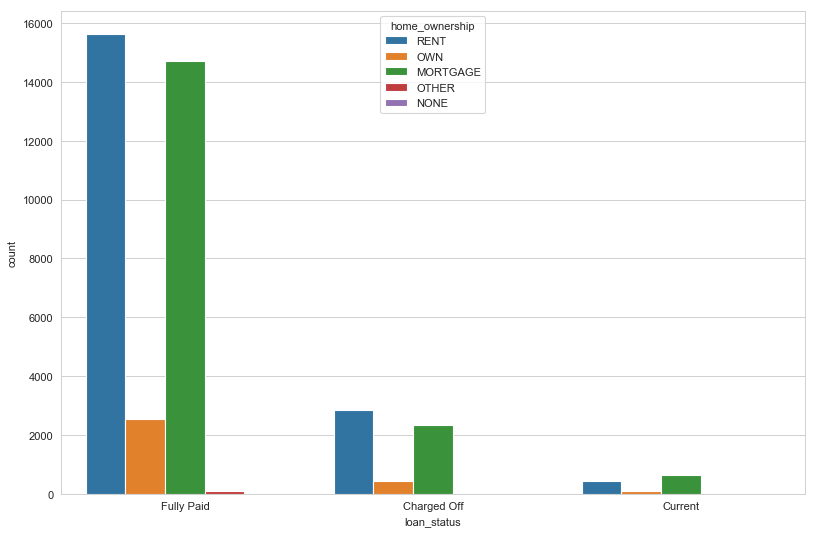

In [48]:
#Analysisng home_ownership on the basis of loan_status
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.countplot(x='loan_status', hue="home_ownership", data=checked_loan)
plt.show()

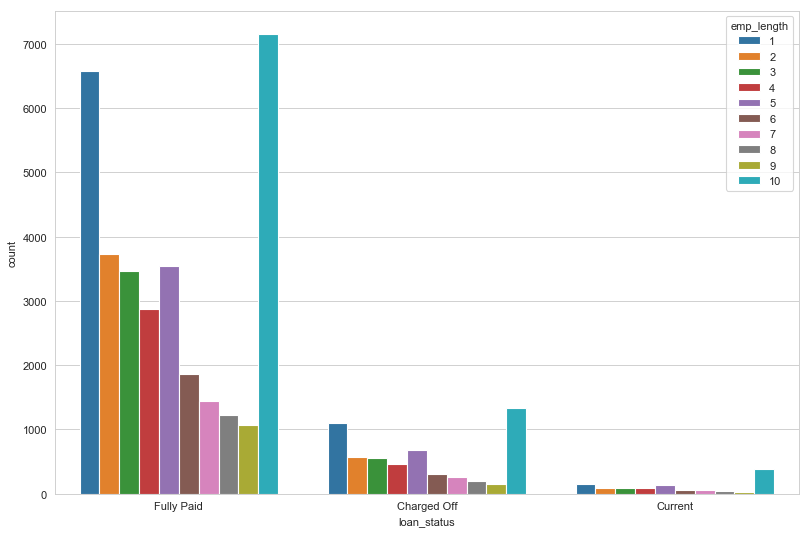

In [49]:
# Bivaritive Analysis of emp_length and loan_status column 
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.countplot(x='loan_status', hue="emp_length", data=checked_loan)
plt.show()

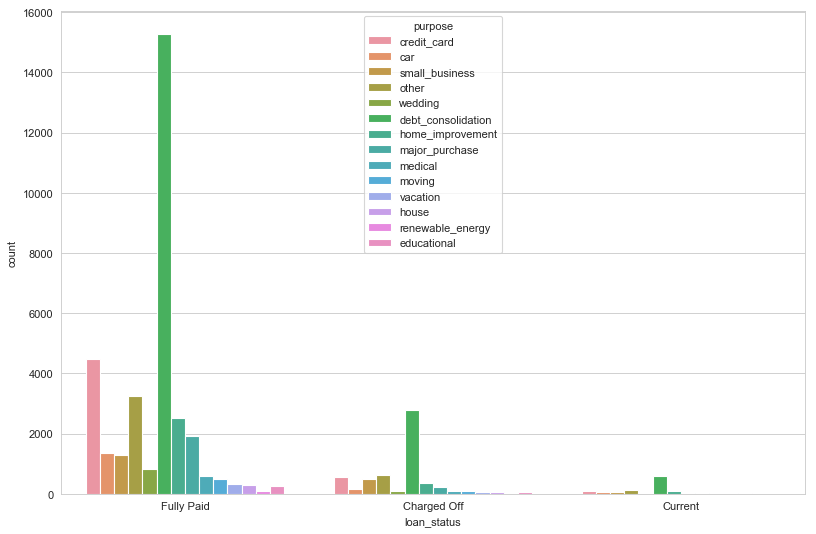

In [50]:
#Relationship between Purpose and loan_status
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.countplot(x='loan_status',hue="purpose", data=checked_loan,)
plt.show()

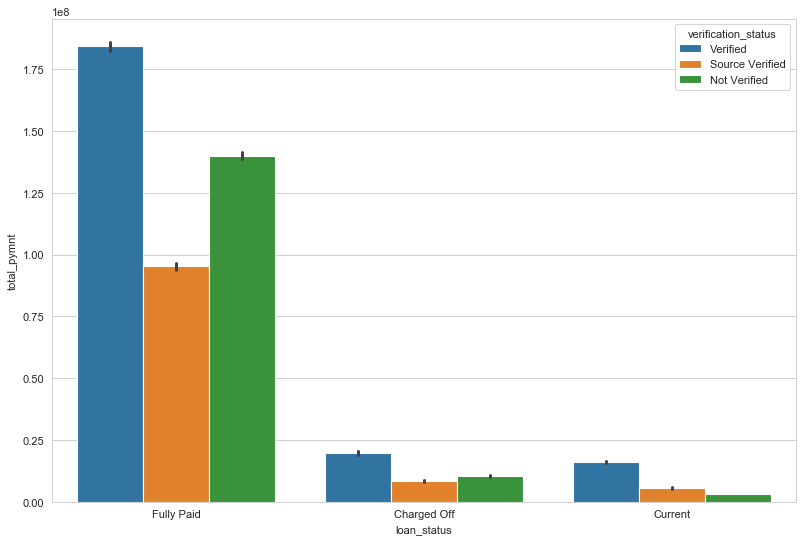

In [52]:
#
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='loan_status', y='total_pymnt', hue="verification_status", data=checked_loan, estimator=np.sum)
plt.show()

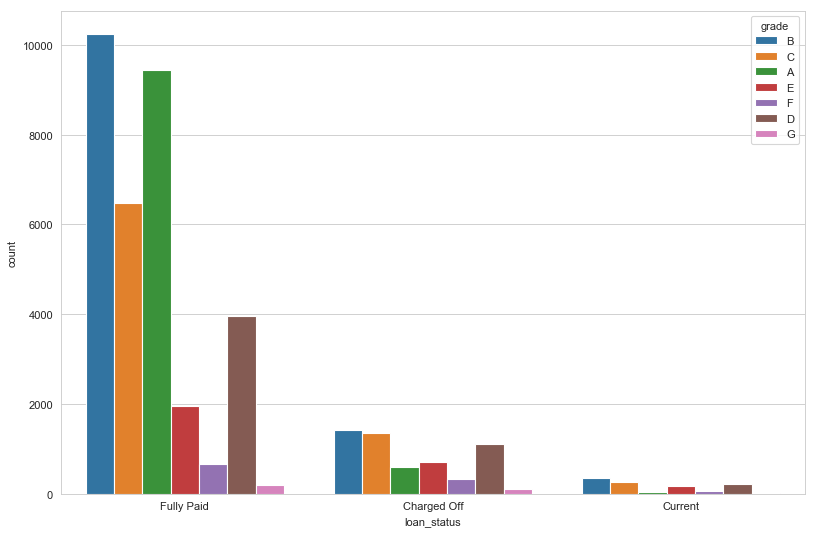

In [53]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.countplot(x='loan_status',hue="grade", data=checked_loan)
plt.show()

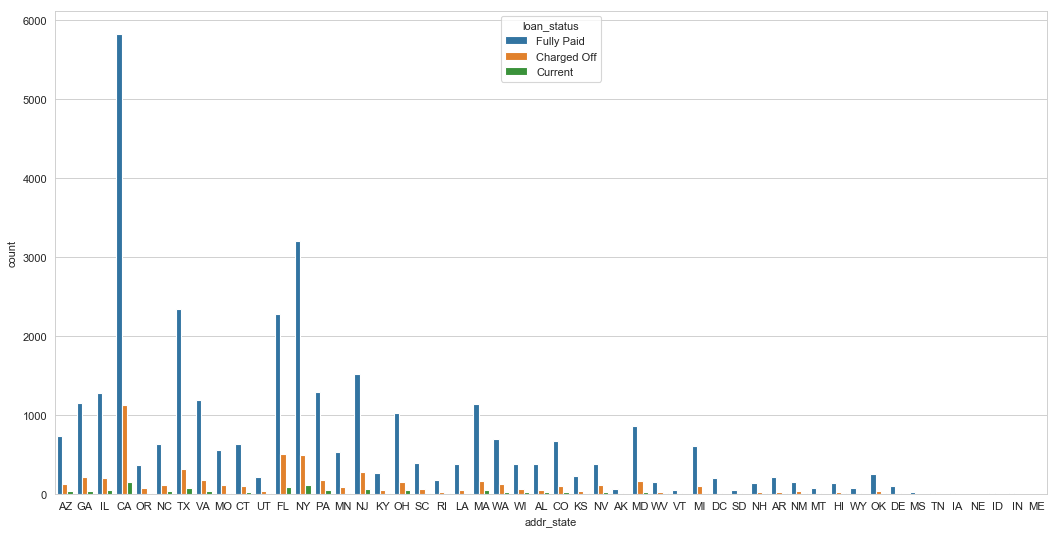

In [54]:
#From this plot we can identify that CA is having the most fully paid and charge off values.
# Bivariation between loan status and address state.
# set figure size for larger figure
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.countplot(x='addr_state',hue="loan_status", data=checked_loan)
plt.show()